In [1]:
cd ..

/home/constance/Documents/epfl/MA1/ML/predicting-poverty-through-time/src


In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from lib import estimator_util as eu
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
sns.set_theme()

In [5]:
complete_df, all_cols = eu.get_data("../data/lsms/processed/_all_real.csv", "../data/cnn_features/resnet_trans_all_countries_hyper.csv", "../data/")

In [6]:
all_cols

['building_count',
 'building_area',
 'building_density',
 'residential_count',
 'residential_area',
 'residential_density',
 'industry_count',
 'industry_area',
 'industry_density',
 'education_count',
 'education_area',
 'education_density',
 'health_count',
 'health_area',
 'health_density',
 'library',
 'hostel',
 'car_rental',
 'shelter',
 'furniture_shop',
 'water_works',
 'bar',
 'post_box',
 'tourist_info',
 'pub',
 'laundry',
 'water_tower',
 'tower',
 'community_centre',
 'nightclub',
 'college',
 'cafe',
 'bench',
 'gift_shop',
 'mobile_phone_shop',
 'hotel',
 'pharmacy',
 'bank',
 'fast_food',
 'car_dealership',
 'computer_shop',
 'bakery',
 'toilet',
 'clothes',
 'park',
 'department_store',
 'supermarket',
 'chalet',
 'memorial',
 'prison',
 'cinema',
 'travel_agent',
 'track',
 'waste_basket',
 'guesthouse',
 'school',
 'monument',
 'graveyard',
 'motel',
 'university',
 'greengrocer',
 'mall',
 'playground',
 'chemist',
 'police',
 'telephone',
 'picnic_site',
 'public_

In [7]:
countries = ["NG", "ETH" ,"TZA", "MW"]

# Study OSM feature importance with PCA

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1, random_state=1)
_ = pca.fit(complete_df[all_cols])
features_weights = list(zip(all_cols, pca.components_.T))

In [14]:
features_weights

[('building_count', array([0.00025553])),
 ('building_area', array([0.03154617])),
 ('building_density', array([0.00074045])),
 ('residential_count', array([2.49858899e-06])),
 ('residential_area', array([0.99905543])),
 ('residential_density', array([0.02294164])),
 ('industry_count', array([-0.])),
 ('industry_area', array([-0.])),
 ('industry_density', array([-0.])),
 ('education_count', array([4.86528608e-07])),
 ('education_area', array([0.01117126])),
 ('education_density', array([0.00025874])),
 ('health_count', array([2.92953834e-07])),
 ('health_area', array([0.00161522])),
 ('health_density', array([3.72994064e-05])),
 ('library', array([2.37964221e-08])),
 ('hostel', array([0.])),
 ('car_rental', array([1.01107799e-08])),
 ('shelter', array([1.09200067e-08])),
 ('furniture_shop', array([0.])),
 ('water_works', array([0.])),
 ('bar', array([1.52815589e-07])),
 ('post_box', array([1.10159483e-09])),
 ('tourist_info', array([0.])),
 ('pub', array([1.79454171e-08])),
 ('laundry'

# Study OSM features for every countries at once

In [8]:
X, y, year_df, osm_X = eu.get_recent_osm_features(complete_df, countries, all_cols)

### With OSM features non standardized

In [9]:
osm_X = pd.DataFrame(osm_X, columns = all_cols)

In [10]:
osm_X.describe()

,building_count,building_area,building_density,residential_count,residential_area,residential_density,industry_count,industry_area,industry_density,education_count,...,density_trunk,density_residential,density_pedestrian,density_service,density_primary,density_intersection,density_secondary,density_living_street,density_track,density_tertiary
count,708.000000,7.080000e+02,708.000000,708.000000,7.080000e+02,708.000000,708.0,708.0,708.0,708.000000,...,708.000000,708.000000,708.000000,708.000000,708.000000,708.0,708.000000,708.000000,708.000000,708.000000
mean,4233.816384,3.406160e+05,8084.409195,50.451977,3.057171e+06,72582.430071,0.0,0.0,0.0,1.415254,...,67.339506,1458.442218,0.008658,40.726172,14.865395,0.0,48.709703,0.011949,389.658291,148.130636
std,8958.123950,8.079813e+05,19190.899574,154.444267,6.092496e+06,144489.825119,0.0,0.0,0.0,3.300147,...,98.133517,1483.056368,0.230380,112.014788,45.307875,0.0,79.831634,0.271914,787.620345,152.854962
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,537.735000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,8.495000,0.000000
50%,257.000000,1.537306e+04,365.385000,3.000000,2.135521e+05,5112.465000,0.0,0.0,0.0,0.000000,...,0.000000,1017.640000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,112.145000,120.565000
75%,3289.250000,1.533974e+05,3702.365000,34.000000,2.624780e+06,62137.725000,0.0,0.0,0.0,1.000000,...,154.785000,1695.800000,0.000000,7.965000,0.000000,0.0,84.457500,0.000000,509.765000,235.752500
max,50720.000000,4.662329e+06,110327.160000,1683.000000,3.801784e+07,899636.300000,0.0,0.0,0.0,24.000000,...,788.680000,8327.110000,6.130000,860.700000,278.470000,0.0,426.110000,7.110000,10142.040000,753.860000


### With OSM features standardized

In [11]:
X = pd.DataFrame(X, columns = all_cols)

In [12]:
#get the name of features filled with null values for all four countries
null_features = X.loc[:, (X == 0).any(axis=0)].keys()
print(null_features)

Index(['industry_count', 'industry_area', 'industry_density', 'hostel',
       'furniture_shop', 'water_works', 'tourist_info', 'laundry',
       'water_tower', 'tower', 'gift_shop', 'mobile_phone_shop', 'hotel',
       'car_dealership', 'computer_shop', 'bakery', 'toilet', 'clothes',
       'park', 'department_store', 'supermarket', 'chalet', 'memorial',
       'travel_agent', 'track', 'guesthouse', 'monument', 'graveyard', 'motel',
       'greengrocer', 'mall', 'playground', 'chemist', 'picnic_site',
       'doityourself', 'comms_tower', 'convenience', 'viewpoint', 'butcher',
       'museum', 'bookshop', 'camp_site', 'water_well', 'bicycle_shop',
       'outdoor_shop', 'camera_surveillance', 'sports_shop', 'stationery',
       'sports_centre', 'attraction', 'florist', 'artwork', 'jeweller',
       'stadium', 'hairdresser', 'beauty_shop', 'beverages', 'town_hall',
       'others', 'toy_shop', 'kiosk', 'shoe_shop', 'count_intersection',
       'length_intersection', 'density_intersecti

In [13]:
#remove all features filled with 0
X = X.loc[:, (X != 0).any(axis=0)]

In [14]:
X.describe()

,building_count,building_area,building_density,residential_count,residential_area,residential_density,education_count,education_area,education_density,health_count,...,length_tertiary,density_trunk,density_residential,density_pedestrian,density_service,density_primary,density_secondary,density_living_street,density_track,density_tertiary
count,2.288000e+03,2.288000e+03,2.288000e+03,2.288000e+03,2.288000e+03,2.288000e+03,2.288000e+03,2.288000e+03,2.288000e+03,2.288000e+03,...,2.288000e+03,2.288000e+03,2.288000e+03,2.288000e+03,2.288000e+03,2.288000e+03,2.288000e+03,2.288000e+03,2.288000e+03,2.288000e+03
mean,-3.463169e-15,1.993852e-15,-9.654889e-16,-1.249850e-16,6.215890e-17,-1.618509e-16,-9.523753e-16,-4.475587e-16,-1.685108e-16,4.056584e-17,...,-2.568749e-15,-3.421408e-16,1.532707e-15,3.375432e-16,-1.068929e-15,7.861330e-16,-3.305582e-15,-3.032733e-16,-2.322558e-15,-1.069609e-15
std,1.000219e+00,1.000219e+00,1.000219e+00,1.000219e+00,1.000219e+00,1.000219e+00,1.000219e+00,1.000219e+00,1.000219e+00,1.000219e+00,...,1.000219e+00,1.000219e+00,1.000219e+00,1.000219e+00,1.000219e+00,1.000219e+00,1.000219e+00,1.000219e+00,1.000219e+00,1.000219e+00
min,-2.743855e-01,-3.074881e-01,-3.057836e-01,-2.415601e-01,-4.771283e-01,-4.781764e-01,-2.392993e-01,-2.332580e-01,-2.331543e-01,-2.773804e-01,...,-8.071856e-01,-5.676370e-01,-6.047023e-01,-6.321330e-02,-3.500160e-01,-3.515032e-01,-5.017488e-01,-4.576285e-02,-3.193451e-01,-8.116461e-01
25%,-2.743855e-01,-3.074881e-01,-3.057836e-01,-2.415601e-01,-4.771283e-01,-4.781764e-01,-2.392993e-01,-2.332580e-01,-2.331543e-01,-2.773804e-01,...,-8.071856e-01,-5.676370e-01,-6.047023e-01,-6.321330e-02,-3.500160e-01,-3.515032e-01,-5.017488e-01,-4.576285e-02,-3.193451e-01,-8.116461e-01
50%,-2.742041e-01,-3.071098e-01,-3.054127e-01,-2.305128e-01,-4.743155e-01,-4.753513e-01,-2.392993e-01,-2.332580e-01,-2.331543e-01,-2.773804e-01,...,-2.957963e-01,-5.676370e-01,-4.268694e-01,-6.321330e-02,-3.500160e-01,-3.515032e-01,-5.017488e-01,-4.576285e-02,-3.013797e-01,-2.968800e-01
75%,-2.295420e-01,-2.258787e-01,-2.253276e-01,-1.421337e-01,-1.119929e-01,-1.117975e-01,-1.348114e-01,-2.332580e-01,-2.331543e-01,-1.020637e-01,...,4.385371e-01,5.953105e-01,3.626461e-02,-6.321330e-02,-2.506609e-01,-1.423404e-02,2.533673e-01,-4.576285e-02,-8.470713e-02,4.407821e-01
max,8.924654e+00,1.014019e+01,9.757460e+00,1.835119e+01,6.142180e+00,6.031030e+00,1.386658e+01,1.178330e+01,1.146191e+01,1.146884e+01,...,8.311395e+00,6.615154e+00,6.265988e+00,1.876238e+01,9.876012e+00,1.219991e+01,1.285673e+01,3.996425e+01,2.110402e+01,8.270810e+00


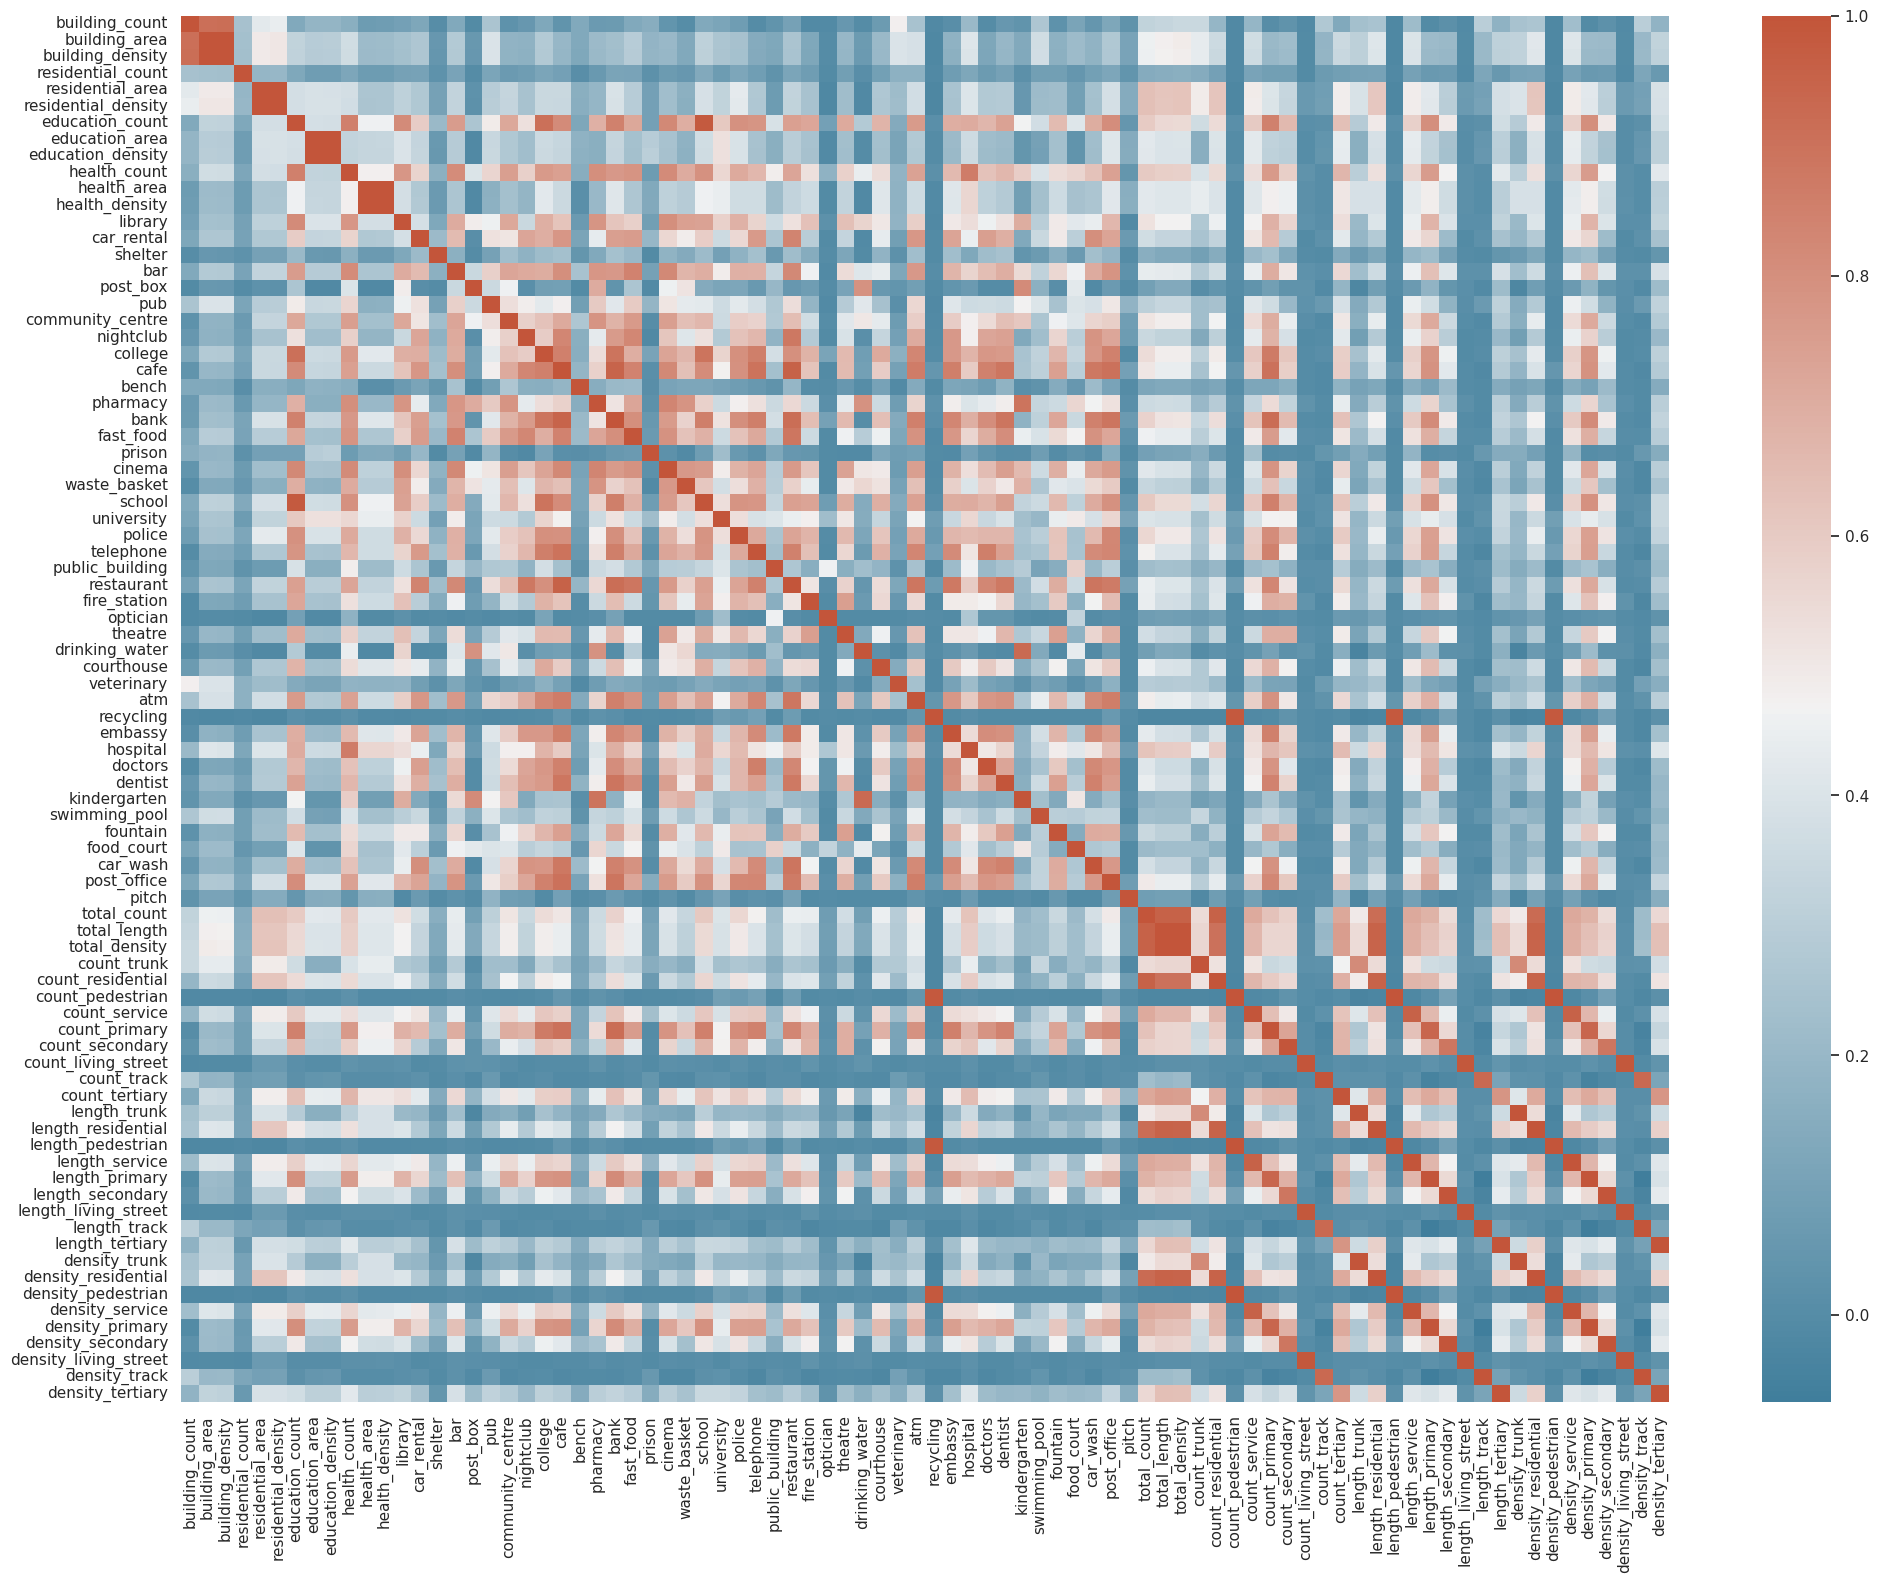

In [16]:
corr = X.corr()
f, ax = plt.subplots(figsize=(24, 18))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#sns_plot = sns.heatmap(corr, cmap=cmap, annot=True, fmt='.2f', annot_kws={'size': 3})
sns_plot = sns.heatmap(corr, cmap=cmap)
sns_plot.figure.savefig("heatmap.png", dpi = 300)

# Study OSM features for each country

NG


,building_count,building_area,building_density,residential_count,residential_area,residential_density,industry_count,industry_area,industry_density,education_count,...,density_trunk,density_residential,density_pedestrian,density_service,density_primary,density_intersection,density_secondary,density_living_street,density_track,density_tertiary
count,645.000000,6.450000e+02,645.000000,645.000000,6.450000e+02,6.450000e+02,645.0,645.0,645.0,645.000000,...,645.000000,645.000000,645.0,645.000000,645.000000,645.0,645.000000,645.000000,645.000000,645.000000
mean,417.939535,1.111071e+05,2527.936946,7.931783,2.755761e+06,6.304326e+04,0.0,0.0,0.0,1.289922,...,91.306961,2665.522233,0.0,76.257395,137.184791,0.0,153.325628,0.177008,32.127442,239.540078
std,2045.938135,4.489258e+05,10242.951365,28.328294,7.344250e+06,1.677409e+05,0.0,0.0,0.0,5.978063,...,153.918398,3716.677110,0.0,166.159978,226.273398,0.0,262.456812,2.116366,95.463092,253.975023
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,...,0.000000,35.910000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,16.110000
50%,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,...,0.000000,704.800000,0.0,0.900000,0.000000,0.0,62.640000,0.000000,0.000000,168.200000
75%,52.000000,2.390152e+04,546.630000,4.000000,7.842879e+05,1.801756e+04,0.0,0.0,0.0,0.000000,...,160.390000,4498.300000,0.0,76.660000,181.570000,0.0,187.420000,0.000000,22.270000,356.790000
max,25719.000000,5.708910e+06,129307.730000,292.000000,4.416136e+07,1.002532e+06,0.0,0.0,0.0,105.000000,...,861.140000,20120.290000,0.0,1487.840000,1354.510000,0.0,2763.010000,30.040000,1071.500000,1429.720000


ETH


,building_count,building_area,building_density,residential_count,residential_area,residential_density,industry_count,industry_area,industry_density,education_count,...,density_trunk,density_residential,density_pedestrian,density_service,density_primary,density_intersection,density_secondary,density_living_street,density_track,density_tertiary
count,516.000000,5.160000e+02,516.000000,516.000000,5.160000e+02,516.000000,516.0,516.0,516.0,516.000000,...,516.000000,516.000000,516.00000,516.000000,516.000000,516.0,516.000000,516.0,516.000000,516.000000
mean,311.670543,1.018401e+05,2336.005969,16.368217,5.627771e+06,128945.135833,0.0,0.0,0.0,5.143411,...,65.642849,2139.294186,0.00469,135.908256,203.863120,0.0,143.372171,0.0,75.320446,174.743818
std,2190.184362,3.166133e+05,7264.311060,29.224276,7.575568e+06,173602.403321,0.0,0.0,0.0,17.240694,...,124.810520,3780.463104,0.09614,333.628078,546.517072,0.0,276.627208,0.0,121.565928,235.156806
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,1.000000,2.836614e+04,654.917500,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
50%,0.000000,0.000000e+00,0.000000,4.000000,1.687596e+06,38610.850000,0.0,0.0,0.0,0.000000,...,0.000000,26.165000,0.00000,0.000000,0.000000,0.0,0.000000,0.0,23.140000,83.300000
75%,49.250000,2.179237e+04,503.715000,19.000000,9.891360e+06,226001.562500,0.0,0.0,0.0,1.000000,...,56.822500,2956.480000,0.00000,21.407500,135.127500,0.0,192.995000,0.0,109.752500,273.590000
max,47227.000000,4.004084e+06,90607.470000,253.000000,2.981028e+07,695524.800000,0.0,0.0,0.0,135.000000,...,604.140000,14969.860000,2.17000,2029.920000,3874.620000,0.0,1891.090000,0.0,975.510000,1923.180000


TZA


,building_count,building_area,building_density,residential_count,residential_area,residential_density,industry_count,industry_area,industry_density,education_count,...,density_trunk,density_residential,density_pedestrian,density_service,density_primary,density_intersection,density_secondary,density_living_street,density_track,density_tertiary
count,419.000000,419.000000,419.000000,419.000000,4.190000e+02,419.000000,419.0,419.0,419.0,419.000000,...,419.000000,419.000000,419.000000,419.000000,419.000000,419.0,419.000000,419.000000,419.000000,419.000000
mean,79.909308,45491.201241,1026.914869,1.782816,1.043692e+06,23672.097757,0.0,0.0,0.0,1.794749,...,36.433461,467.616850,4.670095,25.826826,105.170501,0.0,71.804678,1.918019,24.909308,104.237971
std,284.751392,142289.290403,3213.405615,9.548821,3.843347e+06,87159.278710,0.0,0.0,0.0,6.965800,...,69.644329,1029.110583,31.508158,77.212320,209.560256,0.0,105.350606,20.457572,62.991944,160.554353
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.670000
75%,8.000000,3802.900000,85.945000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,...,21.165000,355.760000,0.000000,4.130000,156.625000,0.0,117.375000,0.000000,9.905000,162.385000
max,1684.000000,979726.850000,22150.160000,157.000000,4.187621e+07,946699.820000,0.0,0.0,0.0,47.000000,...,311.520000,5445.270000,255.810000,535.980000,1285.840000,0.0,524.930000,353.950000,707.950000,750.610000


MW


,building_count,building_area,building_density,residential_count,residential_area,residential_density,industry_count,industry_area,industry_density,education_count,...,density_trunk,density_residential,density_pedestrian,density_service,density_primary,density_intersection,density_secondary,density_living_street,density_track,density_tertiary
count,708.000000,7.080000e+02,708.000000,708.000000,7.080000e+02,708.000000,708.0,708.0,708.0,708.000000,...,708.000000,708.000000,708.000000,708.000000,708.000000,708.0,708.000000,708.000000,708.000000,708.000000
mean,4233.816384,3.406160e+05,8084.409195,50.451977,3.057171e+06,72582.430071,0.0,0.0,0.0,1.415254,...,67.339506,1458.442218,0.008658,40.726172,14.865395,0.0,48.709703,0.011949,389.658291,148.130636
std,8958.123950,8.079813e+05,19190.899574,154.444267,6.092496e+06,144489.825119,0.0,0.0,0.0,3.300147,...,98.133517,1483.056368,0.230380,112.014788,45.307875,0.0,79.831634,0.271914,787.620345,152.854962
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,537.735000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,8.495000,0.000000
50%,257.000000,1.537306e+04,365.385000,3.000000,2.135521e+05,5112.465000,0.0,0.0,0.0,0.000000,...,0.000000,1017.640000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,112.145000,120.565000
75%,3289.250000,1.533974e+05,3702.365000,34.000000,2.624780e+06,62137.725000,0.0,0.0,0.0,1.000000,...,154.785000,1695.800000,0.000000,7.965000,0.000000,0.0,84.457500,0.000000,509.765000,235.752500
max,50720.000000,4.662329e+06,110327.160000,1683.000000,3.801784e+07,899636.300000,0.0,0.0,0.0,24.000000,...,788.680000,8327.110000,6.130000,860.700000,278.470000,0.0,426.110000,7.110000,10142.040000,753.860000


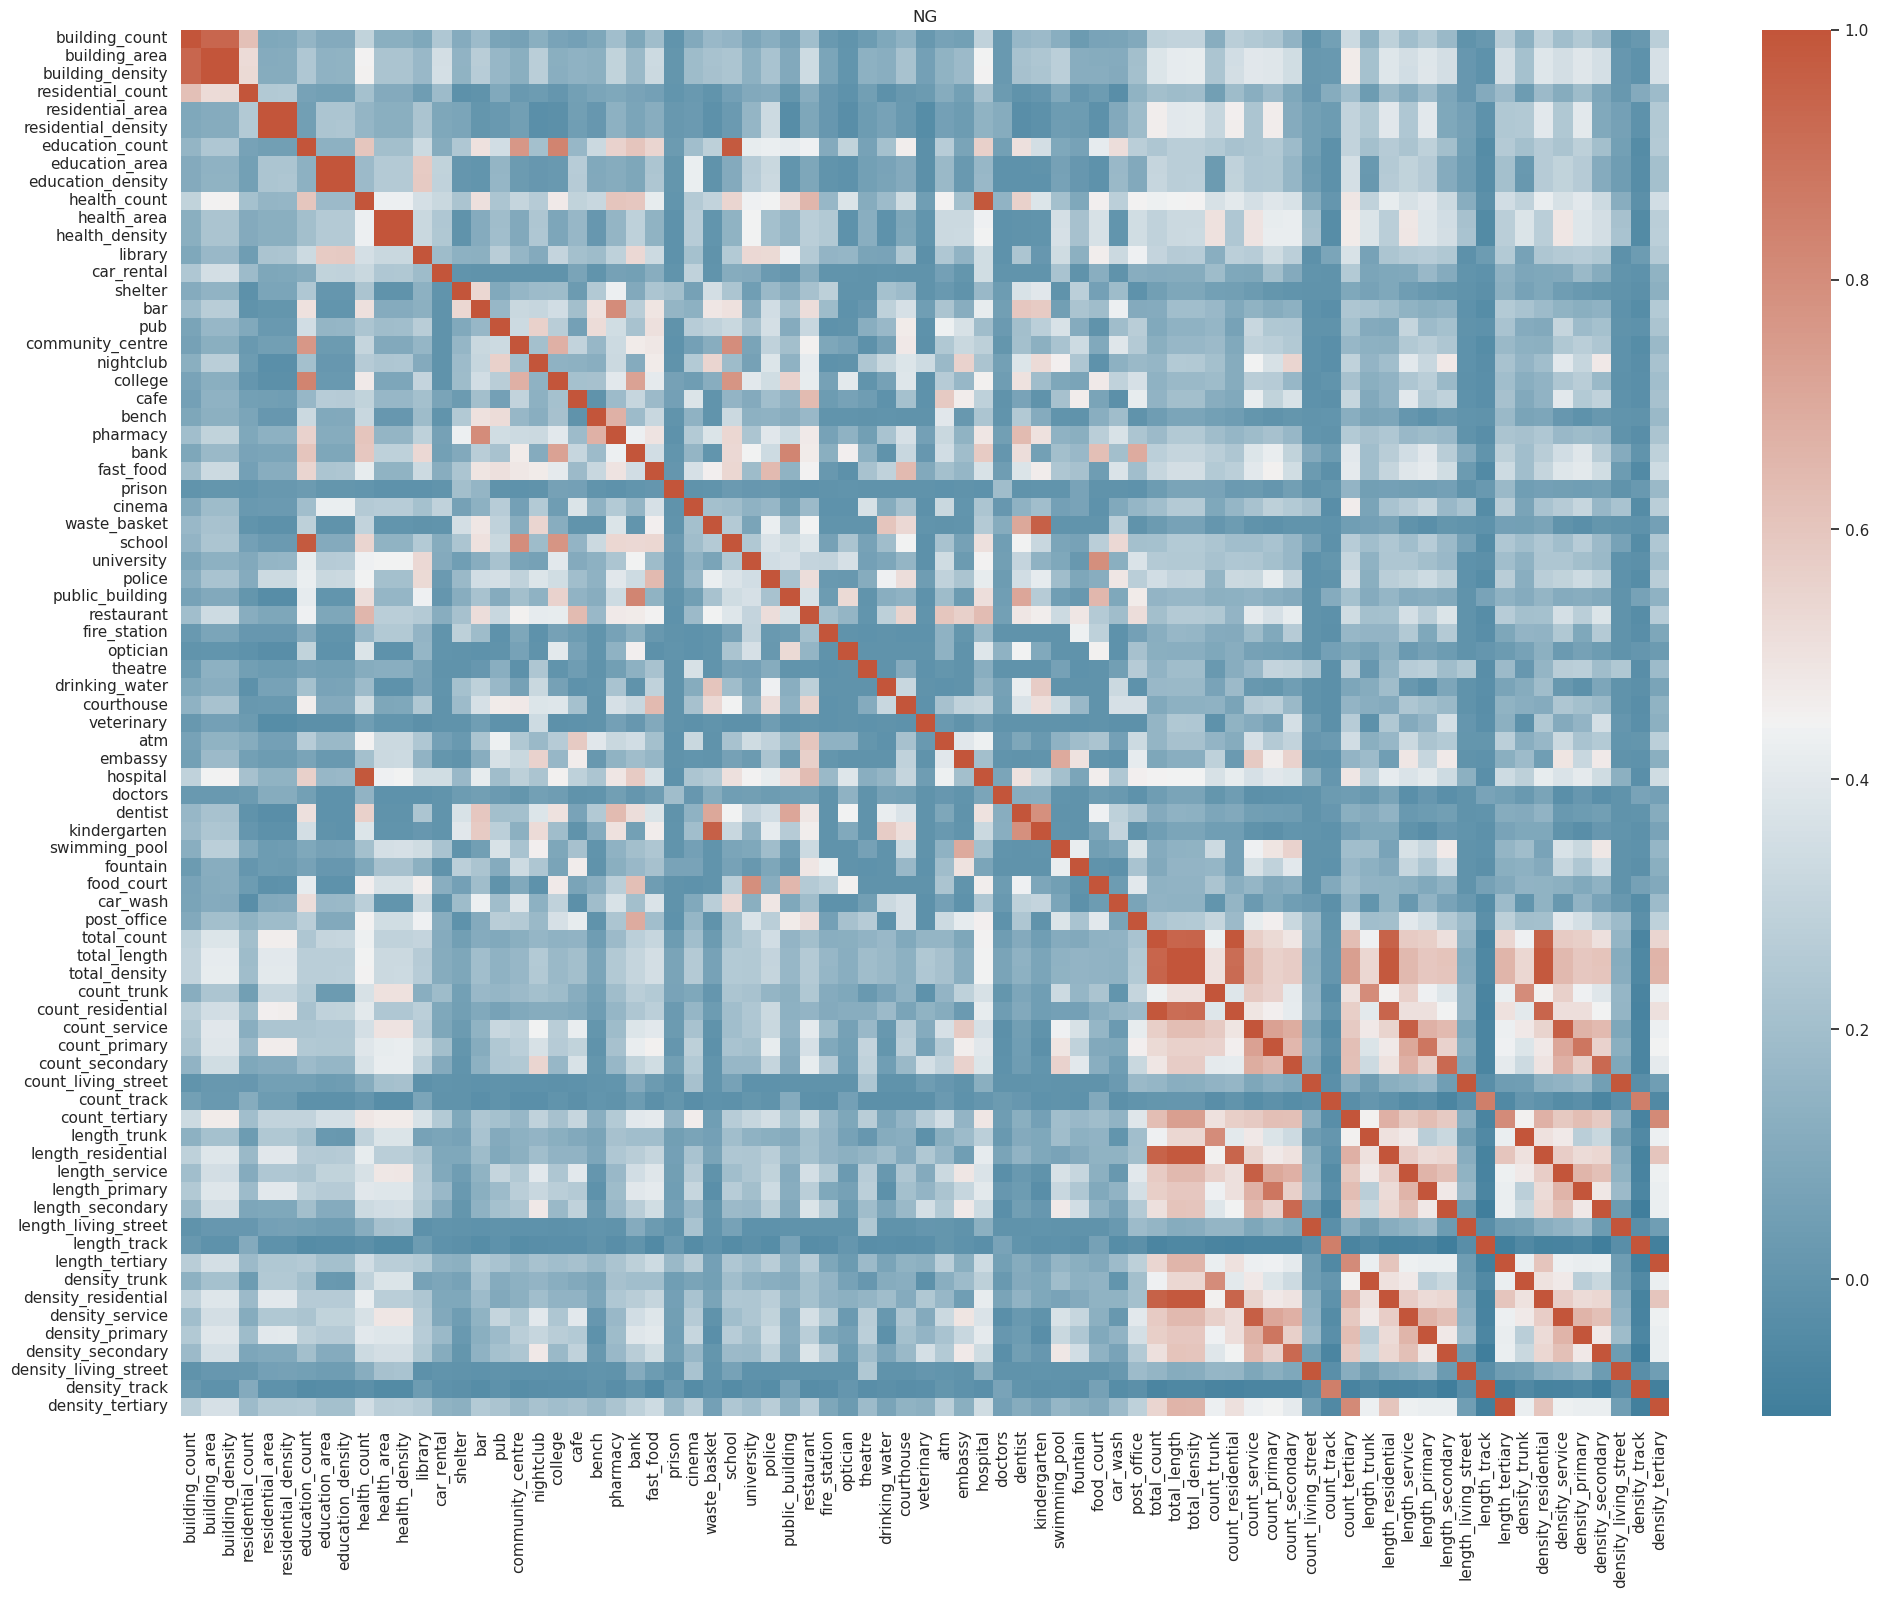

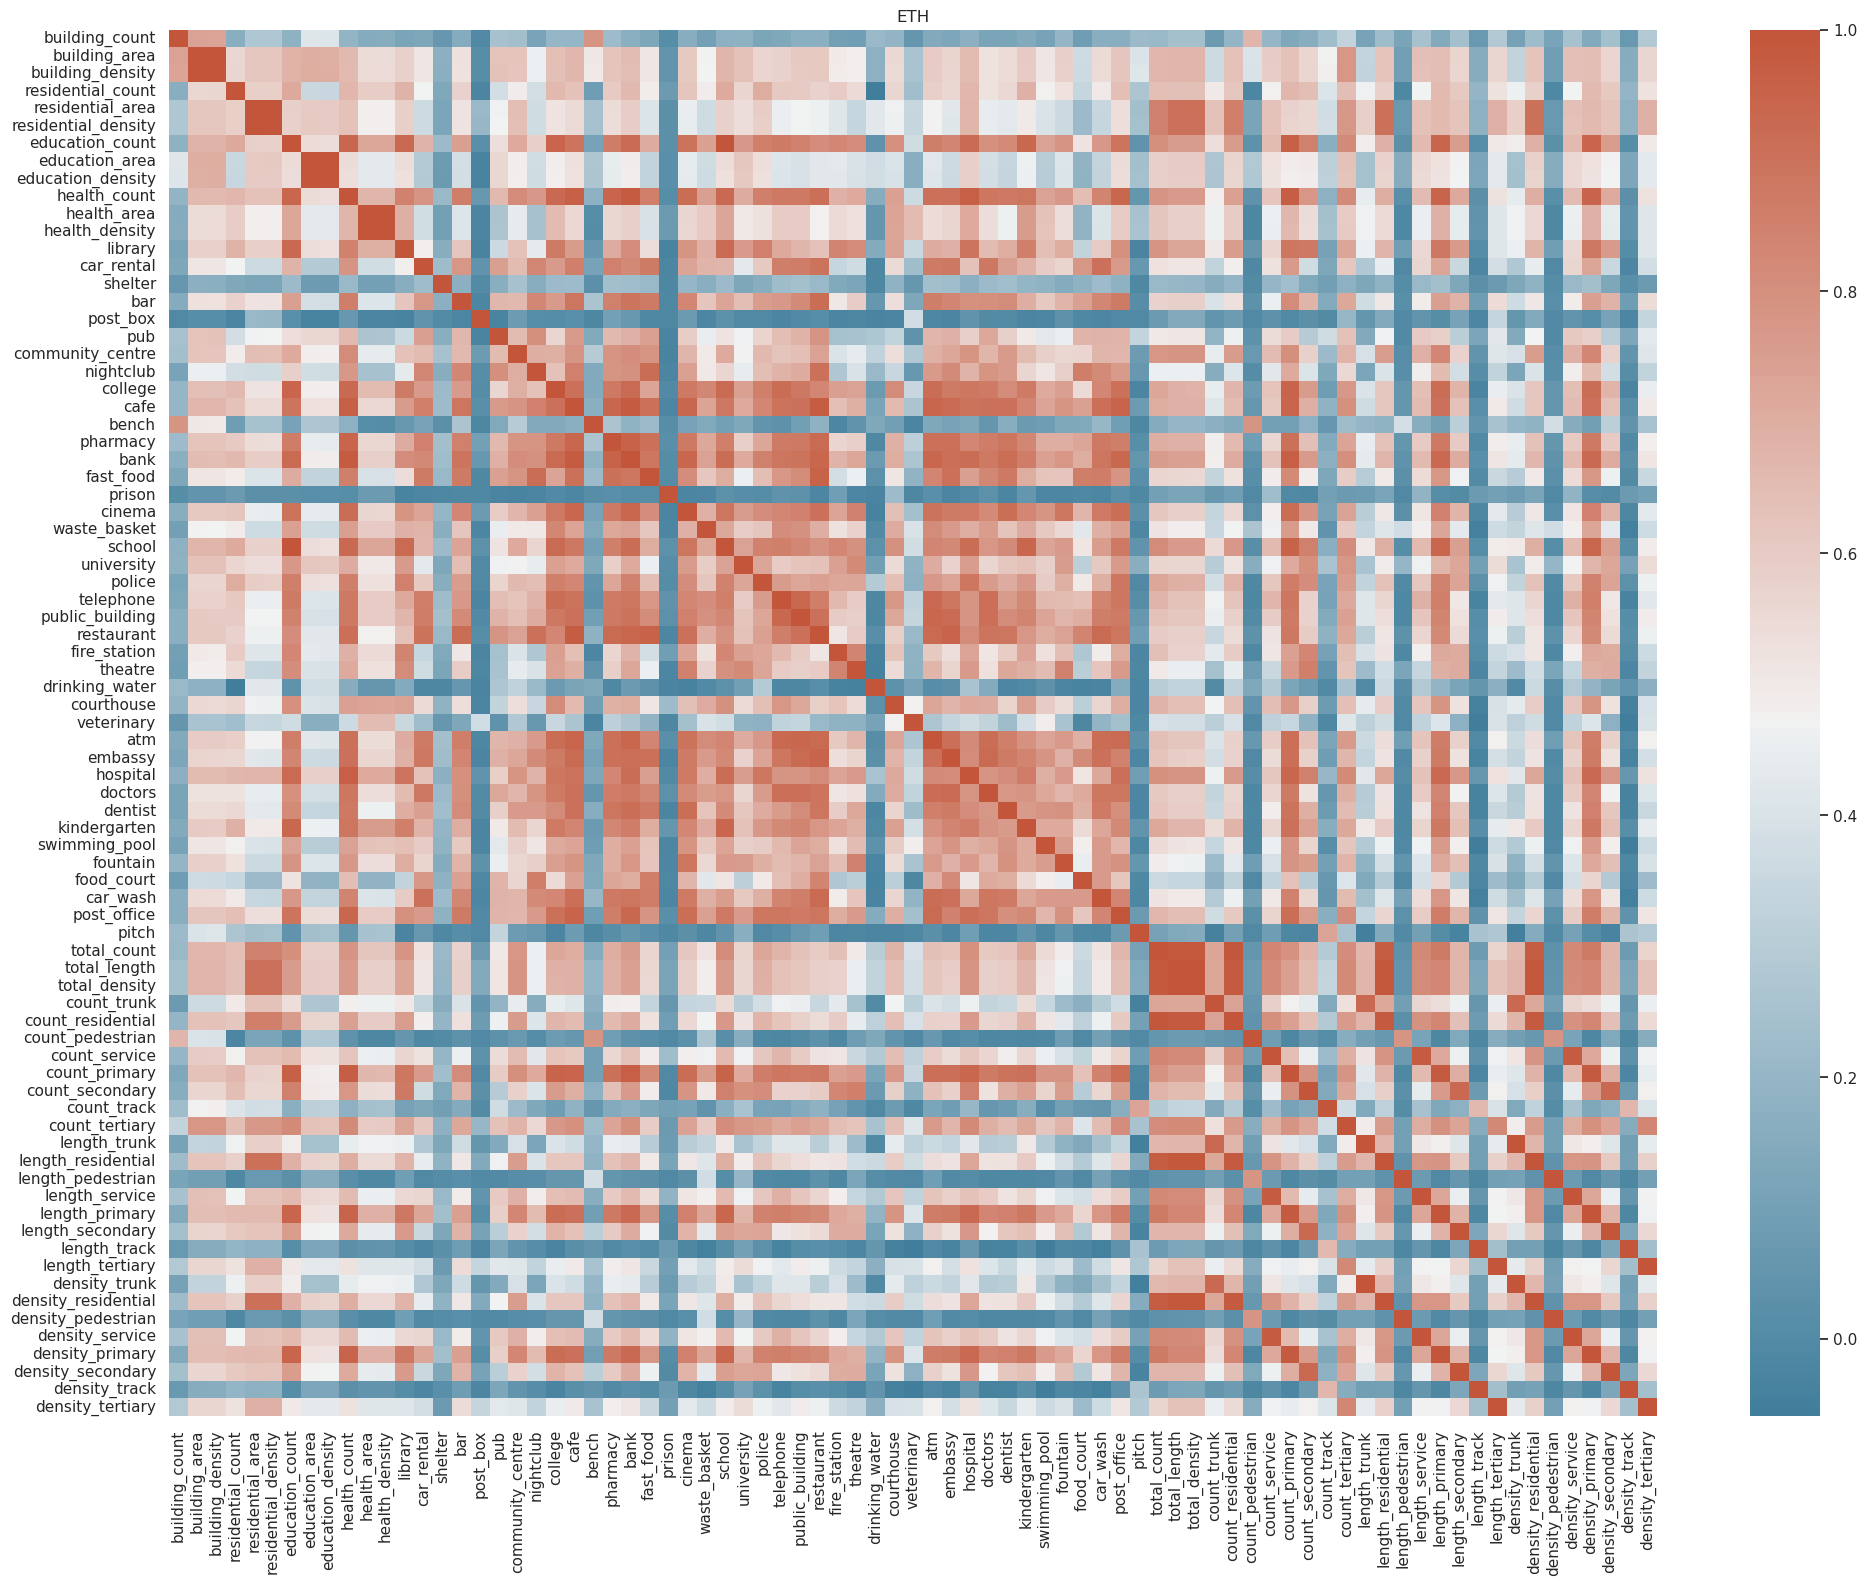

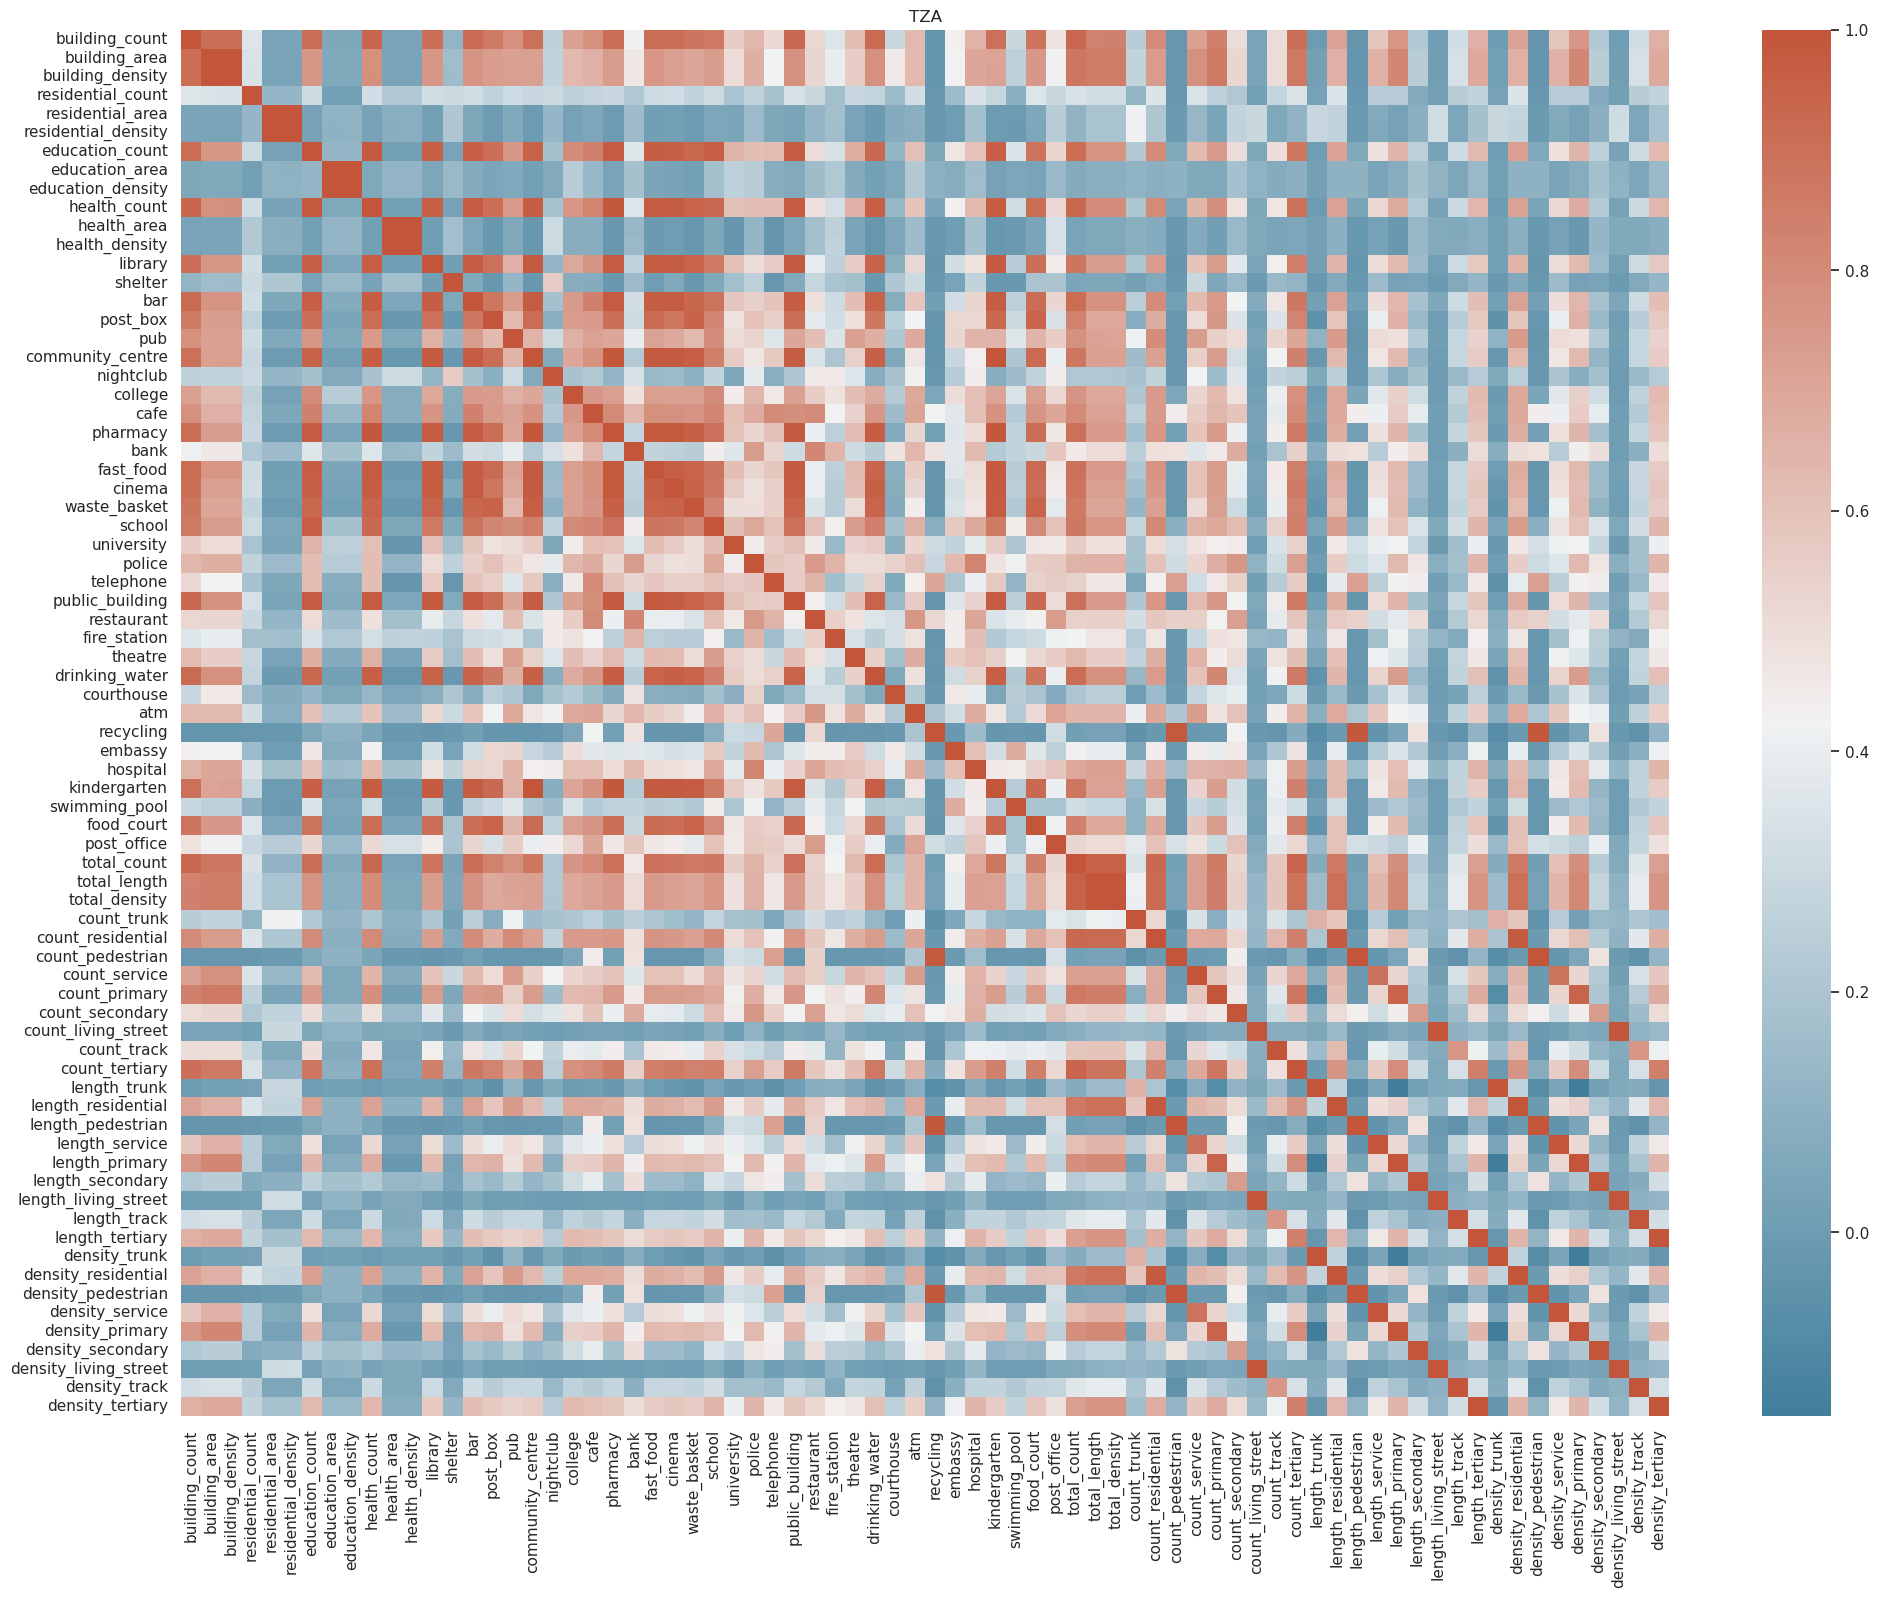

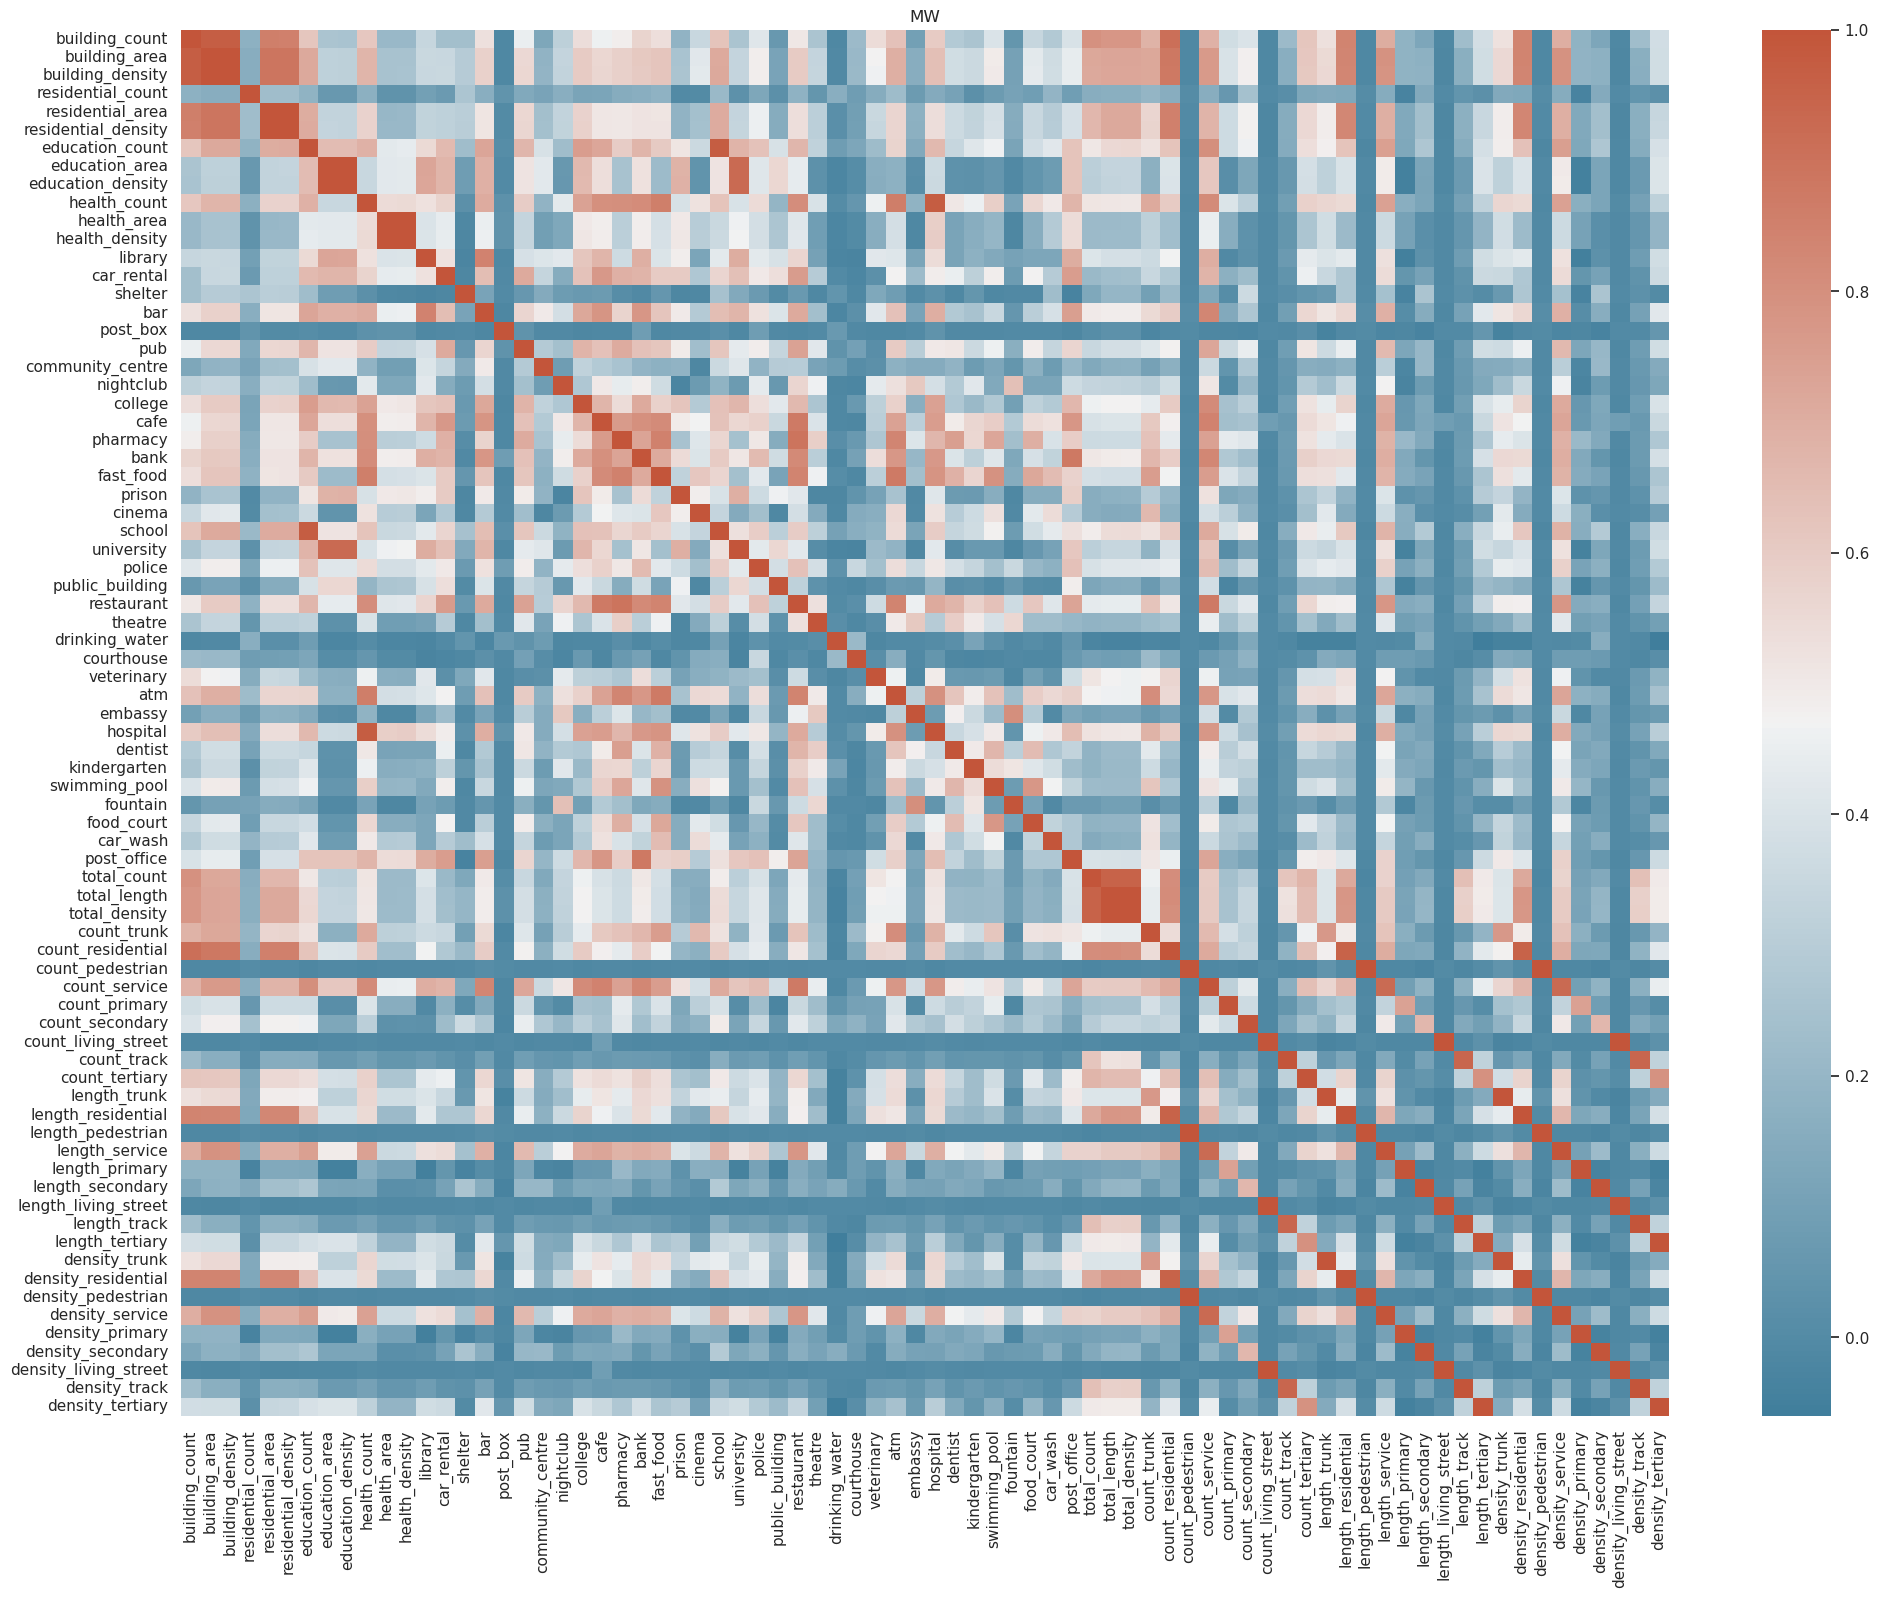

In [20]:
for i, country in enumerate(countries):
    print(country)
    X, y, year_df, osm_X = eu.get_recent_osm_features(complete_df, [country], all_cols)
    osm_X = pd.DataFrame(osm_X, columns = all_cols)
    display(osm_X.describe())
    #remove all features filled with 0
    X = pd.DataFrame(X, columns = all_cols)
    X = X.loc[:, (X != 0).any(axis=0)]

    #create correlation plot
    corr = X.corr()
    f, ax = plt.subplots(figsize=(24, 18))
    ax.set_title(country)
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sns_plot = sns.heatmap(corr, cmap=cmap)
    sns_plot.figure.savefig("heatmap_"+ country + ".png", dpi = 300)